In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from joblib import dump, load

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Préparation dataset

In [2]:
# Import des données
df = pd.read_csv('data/merged_data_2018_2021_for_model.csv' )
df.shape

(423136, 34)

In [3]:
# Encodage des variables catégorielles
cat_var = df.select_dtypes(include='object').columns
encoded_cat = pd.get_dummies(df[cat_var], prefix=cat_var, drop_first=True).astype(int)
df = df.drop(columns=cat_var)
df = pd.concat([df, encoded_cat], axis=1)
print('Taille de dataset apres onehotconding',df.shape)


Taille de dataset apres onehotconding (423136, 51)


In [4]:
# Séparation de la variable cible et des variables explicatives
X = df.drop(['grav'], axis=1)
y = df['grav']

In [5]:
#  Division des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

In [6]:
# Standardisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création variable cible binaire

In [7]:
# Création variable cible binaire
y_bin = y.replace([1, 2], 0) \
         .replace([3, 4], 1)
y_train_bin = y_train.replace([1, 2], 0) \
                         .replace([3, 4], 1)
y_test_bin = y_test.replace([1, 2], 0) \
                        .replace([3, 4], 1)

# KERAS 4 classes Adam +  mean_squared_error

Epoch 1/10
7617/7617 [==============================] - 195s 25ms/step - loss: 7.0217 - accuracy: 0.1712 - val_loss: 7.0221 - val_accuracy: 0.0000e+00
Epoch 2/10
7617/7617 [==============================] - 193s 25ms/step - loss: 7.0217 - accuracy: 0.1604 - val_loss: 7.0221 - val_accuracy: 0.1575
Epoch 3/10
7617/7617 [==============================] - 180s 24ms/step - loss: 7.0217 - accuracy: 0.1717 - val_loss: 7.0221 - val_accuracy: 0.0368
Epoch 4/10
7617/7617 [==============================] - 180s 24ms/step - loss: 7.0217 - accuracy: 0.1598 - val_loss: 7.0221 - val_accuracy: 0.4243
Epoch 5/10
7617/7617 [==============================] - 168s 22ms/step - loss: 7.0217 - accuracy: 0.1550 - val_loss: 7.0221 - val_accuracy: 0.0259
Epoch 6/10
7617/7617 [==============================] - 172s 23ms/step - loss: 7.0217 - accuracy: 0.1676 - val_loss: 7.0221 - val_accuracy: 0.0256
Epoch 7/10
7617/7617 [==============================] - 170s 22ms/step - loss: 7.0217 - accuracy: 0.1645 - val_los

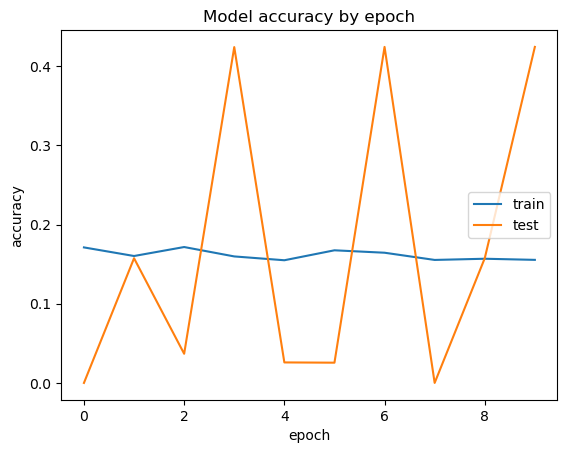

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_mean_square.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 4 classes Adam +  mean_squared_logarithmic_error

Epoch 1/10
7617/7617 [==============================] - 185s 24ms/step - loss: 1.0802 - accuracy: 0.1485 - val_loss: 1.0801 - val_accuracy: 0.0912
Epoch 2/10
7617/7617 [==============================] - 177s 23ms/step - loss: 1.0801 - accuracy: 0.1246 - val_loss: 1.0801 - val_accuracy: 0.1574
Epoch 3/10
7617/7617 [==============================] - 176s 23ms/step - loss: 1.0802 - accuracy: 0.1281 - val_loss: 1.0801 - val_accuracy: 0.0259
Epoch 4/10
7617/7617 [==============================] - 179s 23ms/step - loss: 1.0802 - accuracy: 0.1234 - val_loss: 1.0801 - val_accuracy: 0.4228
Epoch 5/10
7617/7617 [==============================] - 180s 24ms/step - loss: 1.0801 - accuracy: 0.1341 - val_loss: 1.0801 - val_accuracy: 0.0261
Epoch 6/10
7617/7617 [==============================] - 176s 23ms/step - loss: 1.0801 - accuracy: 0.1578 - val_loss: 1.0801 - val_accuracy: 0.1576
Epoch 7/10
7617/7617 [==============================] - 175s 23ms/step - loss: 1.0802 - accuracy: 0.1552 - val_loss: 1

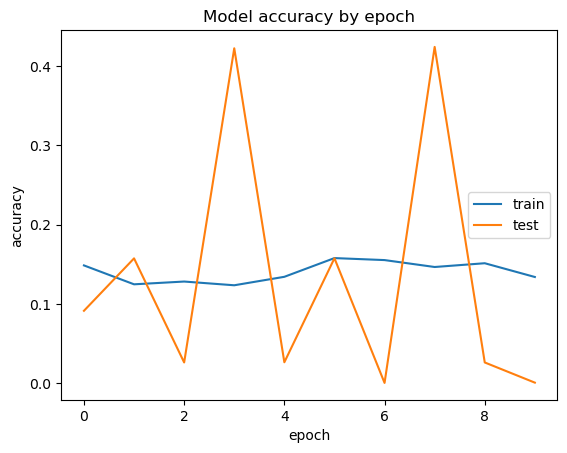

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_logarithmic_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_mean_square_log.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()



# KERAS 4 classes Adam +  categorical_crossentropy

Epoch 1/10


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7617/7617 [==============================] - 201s 26ms/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
7617/7617 [==============================] - 218s 29ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
7617/7617 [==============================] - 242s 32ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
7617/7617 [==============================] - 248s 33ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
7617/7617 [==============================] - 252s 33ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
7617/7617 [==============================] - 254s 33ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
7617/7617 [==============================] - 250s 33ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan

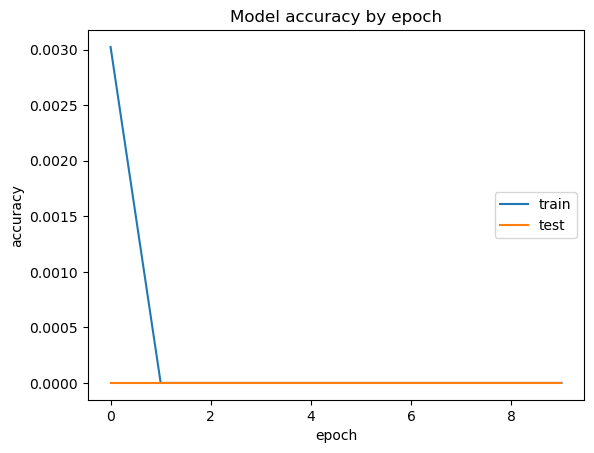

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_categorical_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()



# KERAS 4 classes sgd +  mean_square_error

Epoch 1/10
7617/7617 [==============================] - 149s 19ms/step - loss: 7.0216 - accuracy: 0.1103 - val_loss: 7.0221 - val_accuracy: 0.0893
Epoch 2/10
7617/7617 [==============================] - 146s 19ms/step - loss: 7.0217 - accuracy: 0.0907 - val_loss: 7.0221 - val_accuracy: 0.0880
Epoch 3/10
7617/7617 [==============================] - 146s 19ms/step - loss: 7.0217 - accuracy: 0.0900 - val_loss: 7.0221 - val_accuracy: 0.0879
Epoch 4/10
7617/7617 [==============================] - 145s 19ms/step - loss: 7.0217 - accuracy: 0.0901 - val_loss: 7.0221 - val_accuracy: 0.0882
Epoch 5/10
7617/7617 [==============================] - 146s 19ms/step - loss: 7.0217 - accuracy: 0.0907 - val_loss: 7.0221 - val_accuracy: 0.0878
Epoch 6/10
7617/7617 [==============================] - 147s 19ms/step - loss: 7.0217 - accuracy: 0.0911 - val_loss: 7.0221 - val_accuracy: 0.0887
Epoch 7/10
7617/7617 [==============================] - 147s 19ms/step - loss: 7.0217 - accuracy: 0.0915 - val_loss: 7

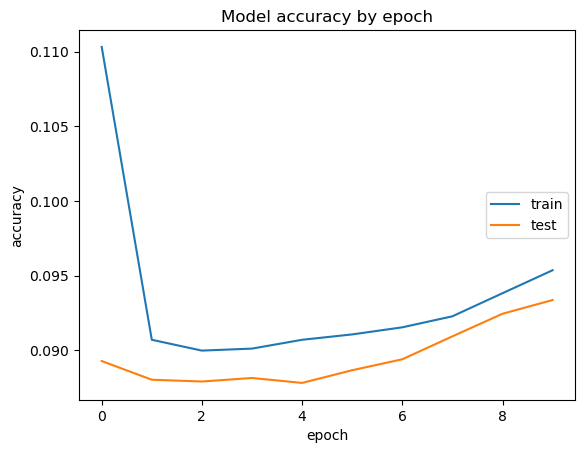

In [9]:
    from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_sgd_mean_square.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 4 classes sgd +  mean_square_log_error

Epoch 1/10
7617/7617 [==============================] - 186s 24ms/step - loss: 1.0802 - accuracy: 0.1220 - val_loss: 1.0801 - val_accuracy: 0.1316
Epoch 2/10
7617/7617 [==============================] - 177s 23ms/step - loss: 1.0802 - accuracy: 0.1294 - val_loss: 1.0801 - val_accuracy: 0.1286
Epoch 3/10
7617/7617 [==============================] - 175s 23ms/step - loss: 1.0802 - accuracy: 0.1251 - val_loss: 1.0801 - val_accuracy: 0.1257
Epoch 4/10
7617/7617 [==============================] - 177s 23ms/step - loss: 1.0802 - accuracy: 0.1222 - val_loss: 1.0801 - val_accuracy: 0.1226
Epoch 5/10
7617/7617 [==============================] - 178s 23ms/step - loss: 1.0802 - accuracy: 0.1201 - val_loss: 1.0801 - val_accuracy: 0.1213
Epoch 6/10
7617/7617 [==============================] - 189s 25ms/step - loss: 1.0802 - accuracy: 0.1187 - val_loss: 1.0801 - val_accuracy: 0.1203
Epoch 7/10
7617/7617 [==============================] - 190s 25ms/step - loss: 1.0802 - accuracy: 0.1179 - val_loss: 1

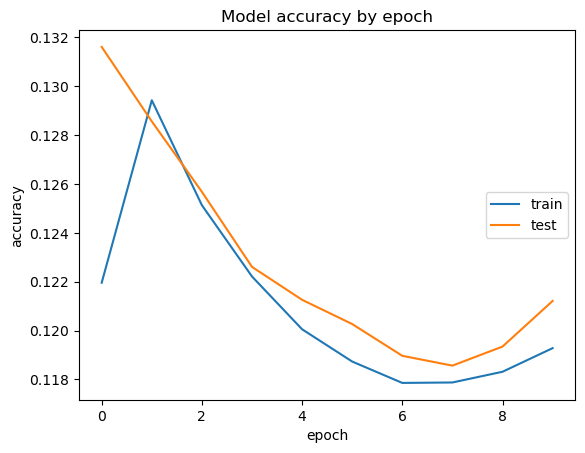

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_logarithmic_error',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_sgd_mean_square_log.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()



# KERAS 4 classes sgd +  categorical_crossentropy

Epoch 1/10
7617/7617 [==============================] - 159s 21ms/step - loss: nan - accuracy: 0.0032 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
7617/7617 [==============================] - 166s 22ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
7617/7617 [==============================] - 160s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
7617/7617 [==============================] - 160s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
7617/7617 [==============================] - 159s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
7617/7617 [==============================] - 161s 21ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
7617/7617 [==============================] - 164s 22ms/step - loss: nan - accuracy: 0.0000e+00 - va

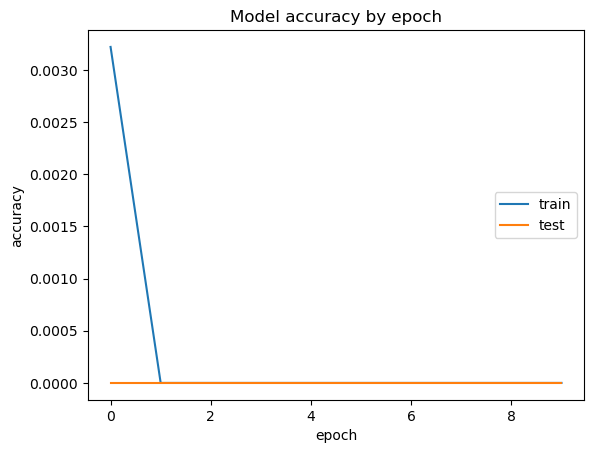

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_sgd_categorical_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()



# KERAS 4 classes adam +  mean_squared_error + softmax + sigmoid

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_mean_square.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 4 classes adam +  mean_squared_error + softmax 

Epoch 1/10
7617/7617 [==============================] - 197s 25ms/step - loss: 7.0217 - accuracy: 0.1235 - val_loss: 7.0221 - val_accuracy: 0.4245
Epoch 2/10
7617/7617 [==============================] - 190s 25ms/step - loss: 7.0217 - accuracy: 0.1523 - val_loss: 7.0221 - val_accuracy: 0.0000e+00
Epoch 3/10
7617/7617 [==============================] - 194s 25ms/step - loss: 7.0217 - accuracy: 0.1588 - val_loss: 7.0221 - val_accuracy: 0.4245
Epoch 4/10
7617/7617 [==============================] - 190s 25ms/step - loss: 7.0217 - accuracy: 0.1514 - val_loss: 7.0221 - val_accuracy: 0.1576
Epoch 5/10
7617/7617 [==============================] - 184s 24ms/step - loss: 7.0217 - accuracy: 0.1531 - val_loss: 7.0221 - val_accuracy: 0.1576
Epoch 6/10
7617/7617 [==============================] - 190s 25ms/step - loss: 7.0217 - accuracy: 0.1516 - val_loss: 7.0221 - val_accuracy: 0.1576
Epoch 7/10
7617/7617 [==============================] - 193s 25ms/step - loss: 7.0217 - accuracy: 0.1497 - val_los

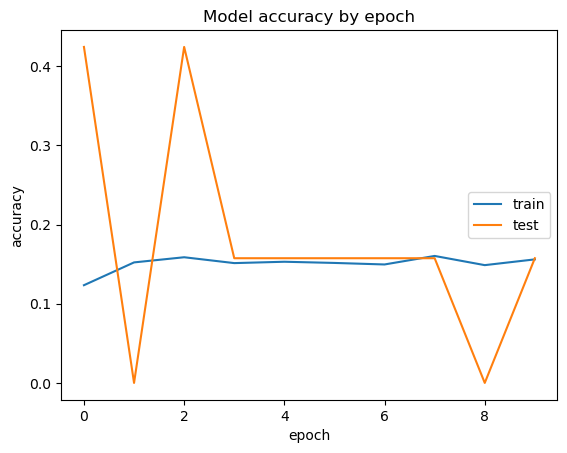

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_mean_square_softmax.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 4 classes adam +  mean_squared_error + tanh 

Epoch 1/10
7617/7617 [==============================] - 190s 25ms/step - loss: 4.1932 - accuracy: 0.1416 - val_loss: 4.1841 - val_accuracy: 0.1290
Epoch 2/10
7617/7617 [==============================] - 176s 23ms/step - loss: 4.1841 - accuracy: 0.0100 - val_loss: 4.1841 - val_accuracy: 2.1270e-04
Epoch 3/10
7617/7617 [==============================] - 185s 24ms/step - loss: 4.1841 - accuracy: 3.3874e-04 - val_loss: 4.1841 - val_accuracy: 0.0000e+00
Epoch 4/10
7617/7617 [==============================] - 196s 26ms/step - loss: 4.1841 - accuracy: 0.0000e+00 - val_loss: 4.1841 - val_accuracy: 0.0000e+00
Epoch 5/10
7617/7617 [==============================] - 205s 27ms/step - loss: 4.1841 - accuracy: 0.0000e+00 - val_loss: 4.1841 - val_accuracy: 0.0000e+00
Epoch 6/10
7617/7617 [==============================] - 200s 26ms/step - loss: 4.1841 - accuracy: 0.0000e+00 - val_loss: 4.1841 - val_accuracy: 0.0000e+00
Epoch 7/10
7617/7617 [==============================] - 198s 26ms/step - loss: 4.1

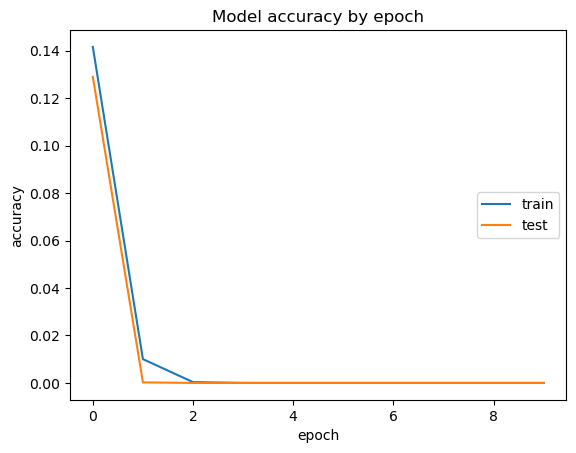

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(4, activation='tanh')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test))    
          
dump(model, 'model/deep_4classes_adam_mean_square_tanh.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes adam +  mean_squared_error

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_mean_square.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes adam +  categorical_crossentropy

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_categorical_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

Epoch 1/10


ValueError: in user code:

    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


# KERAS 2 classes adam +  binary_crossentropy

Epoch 1/10
7617/7617 [==============================] - 208s 27ms/step - loss: 0.5349 - accuracy: 0.5496 - val_loss: 0.4909 - val_accuracy: 0.5496
Epoch 2/10
7617/7617 [==============================] - 189s 25ms/step - loss: 0.4861 - accuracy: 0.5496 - val_loss: 0.4796 - val_accuracy: 0.5496
Epoch 3/10
7617/7617 [==============================] - 201s 26ms/step - loss: 0.4771 - accuracy: 0.5496 - val_loss: 0.4721 - val_accuracy: 0.5496
Epoch 4/10
7617/7617 [==============================] - 196s 26ms/step - loss: 0.4723 - accuracy: 0.5496 - val_loss: 0.4716 - val_accuracy: 0.5496
Epoch 5/10
7617/7617 [==============================] - 197s 26ms/step - loss: 0.4692 - accuracy: 0.5496 - val_loss: 0.4699 - val_accuracy: 0.5496
Epoch 6/10
7617/7617 [==============================] - 197s 26ms/step - loss: 0.4661 - accuracy: 0.5496 - val_loss: 0.4686 - val_accuracy: 0.5496
Epoch 7/10
7617/7617 [==============================] - 213s 28ms/step - loss: 0.4638 - accuracy: 0.5496 - val_loss: 0

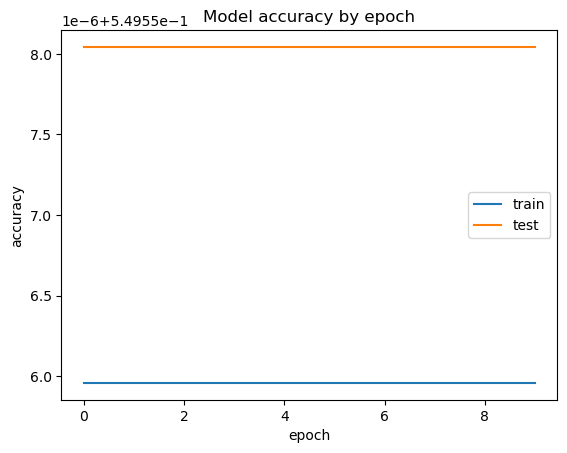

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_binary_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes sgd +  mean_squared_error

Epoch 1/10
7617/7617 [==============================] - 126s 16ms/step - loss: 0.2500 - accuracy: 0.4733 - val_loss: 0.2500 - val_accuracy: 0.4734
Epoch 2/10
7617/7617 [==============================] - 122s 16ms/step - loss: 0.2500 - accuracy: 0.4727 - val_loss: 0.2500 - val_accuracy: 0.4738
Epoch 3/10
7617/7617 [==============================] - 122s 16ms/step - loss: 0.2500 - accuracy: 0.4738 - val_loss: 0.2500 - val_accuracy: 0.4735
Epoch 4/10
7617/7617 [==============================] - 122s 16ms/step - loss: 0.2500 - accuracy: 0.4755 - val_loss: 0.2500 - val_accuracy: 0.4758
Epoch 5/10
7617/7617 [==============================] - 123s 16ms/step - loss: 0.2500 - accuracy: 0.4772 - val_loss: 0.2500 - val_accuracy: 0.4771
Epoch 6/10
7617/7617 [==============================] - 123s 16ms/step - loss: 0.2500 - accuracy: 0.4788 - val_loss: 0.2500 - val_accuracy: 0.4784
Epoch 7/10
7617/7617 [==============================] - 125s 16ms/step - loss: 0.2500 - accuracy: 0.4809 - val_loss: 0

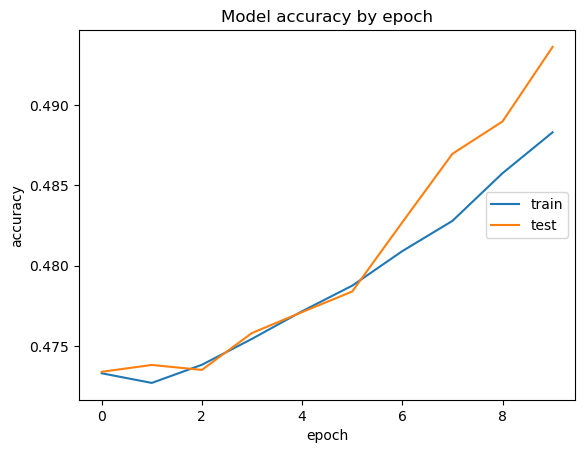

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_sgd_mean_square_error.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes sgd +  categorical_crossentropy

Epoch 1/10


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7617/7617 [==============================] - 146s 19ms/step - loss: nan - accuracy: 0.4526 - val_loss: nan - val_accuracy: 0.4504
Epoch 2/10
7617/7617 [==============================] - 137s 18ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 3/10
7617/7617 [==============================] - 139s 18ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 4/10
7617/7617 [==============================] - 138s 18ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 5/10
7617/7617 [==============================] - 139s 18ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 6/10
7617/7617 [==============================] - 144s 19ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 7/10
7617/7617 [==============================] - 137s 18ms/step - loss: nan - accuracy: 0.4504 - val_loss: nan - val_accuracy: 0.4504
Epoch 8/10
7617/7617 [==

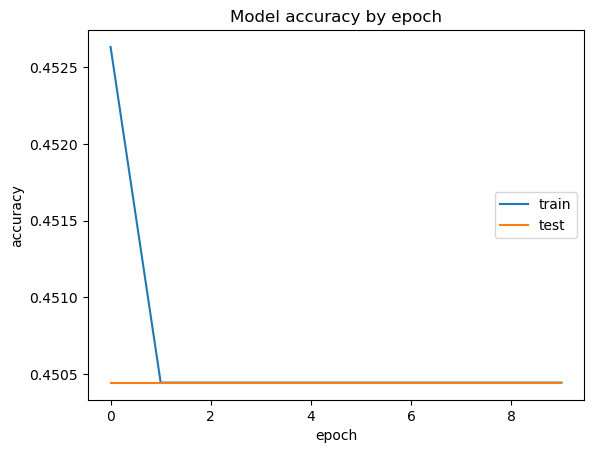

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_sgd_categorical_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes sgd +  binary_crossentropy

Epoch 1/10
7617/7617 [==============================] - 138s 18ms/step - loss: 0.6237 - accuracy: 0.5496 - val_loss: 0.5794 - val_accuracy: 0.5496
Epoch 2/10
7617/7617 [==============================] - 139s 18ms/step - loss: 0.5194 - accuracy: 0.5496 - val_loss: 0.5020 - val_accuracy: 0.5496
Epoch 3/10
7617/7617 [==============================] - 139s 18ms/step - loss: 0.4970 - accuracy: 0.5496 - val_loss: 0.5095 - val_accuracy: 0.5496
Epoch 4/10
7617/7617 [==============================] - 140s 18ms/step - loss: 0.4824 - accuracy: 0.5496 - val_loss: 0.4808 - val_accuracy: 0.5496
Epoch 5/10
7617/7617 [==============================] - 146s 19ms/step - loss: 0.4735 - accuracy: 0.5496 - val_loss: 0.4954 - val_accuracy: 0.5496
Epoch 6/10
7617/7617 [==============================] - 147s 19ms/step - loss: 0.4672 - accuracy: 0.5496 - val_loss: 0.4825 - val_accuracy: 0.5496
Epoch 7/10
7617/7617 [==============================] - 146s 19ms/step - loss: 0.4624 - accuracy: 0.5496 - val_loss: 0

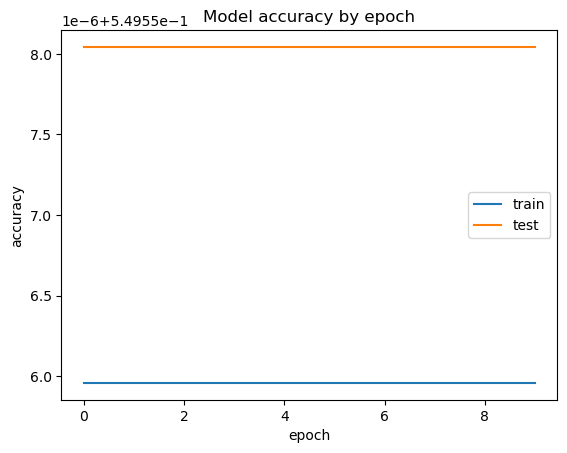

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')
])
model.compile(loss='binary_crossentropy',
             optimizer = 'sgd',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_sgd_binary_crossentropy.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes adam +  mean_squared_error + sigmoid 

Epoch 1/10
7617/7617 [==============================] - 189s 24ms/step - loss: 0.2500 - accuracy: 0.4957 - val_loss: 0.2500 - val_accuracy: 0.5496
Epoch 2/10
7617/7617 [==============================] - 190s 25ms/step - loss: 0.2500 - accuracy: 0.4985 - val_loss: 0.2500 - val_accuracy: 0.5496
Epoch 3/10
7617/7617 [==============================] - 189s 25ms/step - loss: 0.2500 - accuracy: 0.4984 - val_loss: 0.2500 - val_accuracy: 0.5496
Epoch 4/10
7617/7617 [==============================] - 191s 25ms/step - loss: 0.2500 - accuracy: 0.4987 - val_loss: 0.2500 - val_accuracy: 0.4504
Epoch 5/10
7617/7617 [==============================] - 193s 25ms/step - loss: 0.2500 - accuracy: 0.5002 - val_loss: 0.2500 - val_accuracy: 0.5496
Epoch 6/10
7617/7617 [==============================] - 189s 25ms/step - loss: 0.2500 - accuracy: 0.4998 - val_loss: 0.2500 - val_accuracy: 0.5496
Epoch 7/10
7617/7617 [==============================] - 191s 25ms/step - loss: 0.2500 - accuracy: 0.4995 - val_loss: 0

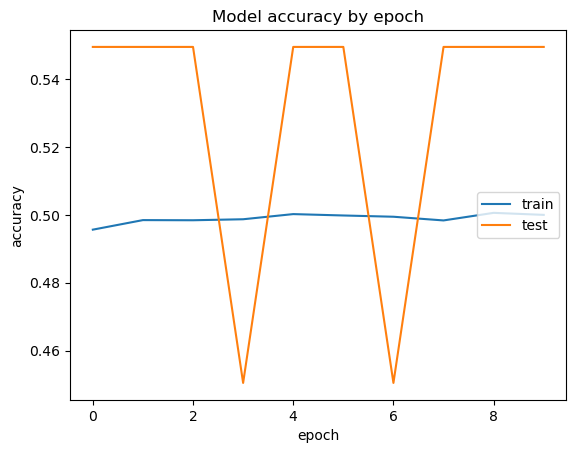

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(400, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(300, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(2, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_mean_square_sigmoid.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes adam +  mean_squared_error + softmax 

Epoch 1/10
7617/7617 [==============================] - 186s 24ms/step - loss: 0.3373 - accuracy: 0.1764 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 2/10
7617/7617 [==============================] - 191s 25ms/step - loss: 0.3373 - accuracy: 0.2573 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 3/10
7617/7617 [==============================] - 192s 25ms/step - loss: 0.3373 - accuracy: 0.2461 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 4/10
7617/7617 [==============================] - 187s 25ms/step - loss: 0.3373 - accuracy: 0.2593 - val_loss: 0.3373 - val_accuracy: 0.0000e+00
Epoch 5/10
7617/7617 [==============================] - 192s 25ms/step - loss: 0.3373 - accuracy: 0.2517 - val_loss: 0.3373 - val_accuracy: 0.4504
Epoch 6/10
7617/7617 [==============================] - 211s 28ms/step - loss: 0.3373 - accuracy: 0.2565 - val_loss: 0.3373 - val_accuracy: 0.4504
Epoch 7/10
7617/7617 [==============================] - 206s 27ms/step - loss: 0.3373 - accuracy: 0.26

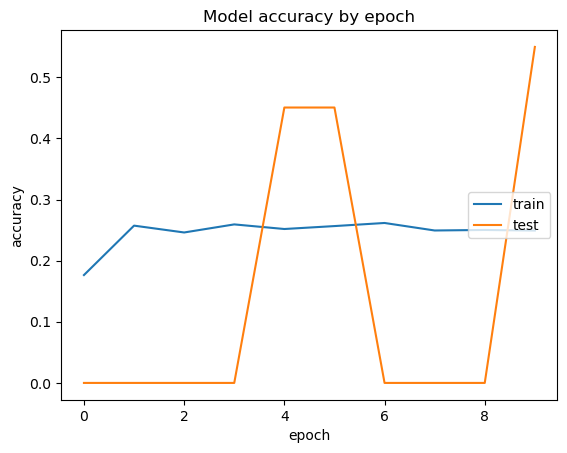

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(500, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(400, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(300, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(100, activation='softmax'),
    Dense(4, activation='softmax')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_mean_square_softmax.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

# KERAS 2 classes adam +  mean_squared_error + tanh 

Epoch 1/10
7617/7617 [==============================] - 221s 28ms/step - loss: 0.2485 - accuracy: 0.2667 - val_loss: 0.2475 - val_accuracy: 0.2525
Epoch 2/10
7617/7617 [==============================] - 201s 26ms/step - loss: 0.2478 - accuracy: 0.2143 - val_loss: 0.2479 - val_accuracy: 0.0000e+00
Epoch 3/10
7617/7617 [==============================] - 202s 27ms/step - loss: 0.2477 - accuracy: 0.1222 - val_loss: 0.2477 - val_accuracy: 0.0000e+00
Epoch 4/10
7617/7617 [==============================] - 204s 27ms/step - loss: 0.2477 - accuracy: 0.2045 - val_loss: 0.2475 - val_accuracy: 0.0000e+00
Epoch 5/10
7617/7617 [==============================] - 209s 27ms/step - loss: 0.2477 - accuracy: 0.2647 - val_loss: 0.2475 - val_accuracy: 0.4504
Epoch 6/10
7617/7617 [==============================] - 200s 26ms/step - loss: 0.2477 - accuracy: 0.2513 - val_loss: 0.2476 - val_accuracy: 0.5044
Epoch 7/10
7617/7617 [==============================] - 201s 26ms/step - loss: 0.2477 - accuracy: 0.2953 -

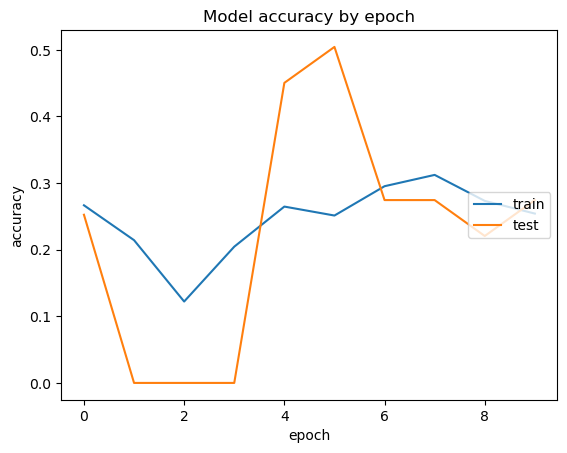

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding

model = Sequential([
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(500, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(400, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(4, activation='tanh')
])
model.compile(loss='mean_squared_error',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_bin,                        
                        epochs = 10,                         
                        batch_size = 50,                    
                        validation_data=(X_test_scaled, y_test_bin))    
          
dump(model, 'model/deep_2classes_adam_mean_square_tanh.joblib')
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()